The shape of test data is (1200, 30, 30, 3)
The shape of reconstructed data is (1200, 30, 30, 3)
Max valid anom is 2.00
Threshold is 3.00


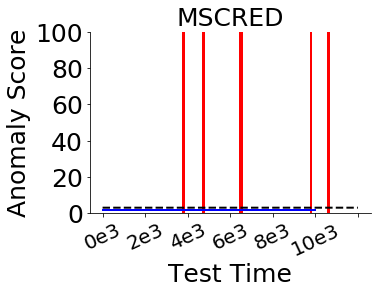

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import os
import utils as util
import re

# score initialization
valid_anomaly_score = np.zeros((util.valid_end_id - util.valid_start_id, 1))
test_anomaly_score = np.zeros((util.test_end_id - util.valid_end_id, 1))

# load the data from file
test_data_path = util.test_data_path
reconstructed_data_path = util.reconstructed_data_path
test_data_path = os.path.join(test_data_path, "test.npy")
reconstructed_data_path = os.path.join(reconstructed_data_path, "test_reconstructed.npy")
test_data = np.load(test_data_path)
test_data = test_data[:, -1, ...]  # only compare the last matrix with the reconstructed data
reconstructed_data = np.load(reconstructed_data_path)
print("The shape of test data is {}".format(test_data.shape))
print("The shape of reconstructed data is {}".format(reconstructed_data.shape))

valid_len = util.valid_end_id - util.valid_start_id

# compute the threshold, threshold = alpha * max{s(t)} , s(t) is the anomaly scores over validation period.
for i in range(util.valid_end_id - util.valid_start_id):
	error = np.square(np.subtract(test_data[i, ..., 0], reconstructed_data[i, ..., 0]))
	num_anom = len(np.where(error > util.threhold))
	valid_anomaly_score[i] = num_anom

max_valid_anom = np.max(valid_anomaly_score)
threshold = max_valid_anom * util.alpha

print("Max valid anom is %.2f" % max_valid_anom)
print("Threshold is %.2f" % threshold)

# compute the anomaly score in the test data.
for i in range(util.test_end_id - util.valid_end_id):
	error = np.square(np.subtract(test_data[i, ..., 0], reconstructed_data[i, ..., 0]))
	num_anom = len(np.where(error > threshold))
	test_anomaly_score[i - valid_len] = num_anom

# plot anomaly score curve and identification result
anomaly_pos = np.zeros(5)
root_cause_gt = np.zeros((5, 3))
anomaly_span = [10, 30, 90]

# Read the test_anomaly.csv, each line behalf of an anomaly, the first is the position, the next three number is the
# root cause.
root_cause_f = open("../data/test_anomaly.csv", "r")

root_cause_gt = np.loadtxt(root_cause_f, delimiter=",", dtype=np.int32)
anomaly_pos = root_cause_gt[:, 0]
anomaly_pos = [(anomaly_pos[i]/util.gap_time-util.test_start_id-anomaly_span[i % 3]/util.gap_time) for i in range(5)]
for i in range(5):
	root_cause_gt[i][0] = anomaly_pos[i]


fig, axes = plt.subplots()
test_num = util.test_end_id - util.test_start_id
plt.xticks(fontsize = 25)
plt.ylim((0, 100))
plt.yticks(np.arange(0, 101, 20), fontsize = 25)
plt.plot(test_anomaly_score, 'b', linewidth = 2)
threshold = np.full((test_num), max_valid_anom * util.alpha)
axes.plot(threshold, color = 'black', linestyle = '--',linewidth = 2)
for k in range(len(anomaly_pos)):
	axes.axvspan(anomaly_pos[k], anomaly_pos[k] + anomaly_span[k%3]/util.gap_time, color='red', linewidth=2)

labels = [' ', '0e3', '2e3', '4e3', '6e3', '8e3', '10e3']
axes.set_xticklabels(labels, rotation = 25, fontsize = 20)
plt.xlabel('Test Time', fontsize = 25)
plt.ylabel('Anomaly Score', fontsize = 25)
axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)
axes.yaxis.set_ticks_position('left')
axes.xaxis.set_ticks_position('bottom')
fig.subplots_adjust(bottom=0.25)
fig.subplots_adjust(left=0.25)
plt.title("MSCRED", size = 25)
plt.show()


In [9]:
reconstructed_data

array([[[[ 7.04064071e-01,  3.74522775e-01,  4.47765976e-01],
         [-2.98897862e-01, -7.66673505e-01,  4.26859260e-01],
         [ 5.42617023e-01,  3.69995445e-01, -6.44724131e-01],
         ...,
         [-1.01098157e-01,  2.04227835e-01, -5.04897773e-01],
         [-3.84952039e-01, -3.95544618e-01,  5.00987656e-02],
         [-8.38977844e-02, -8.14120397e-02, -5.31205954e-03]],

        [[-2.64311314e-01, -2.52485245e-01, -3.25333983e-01],
         [ 4.30644780e-01,  3.51560205e-01, -2.94740409e-01],
         [-3.42947125e-01, -2.47012973e-01,  3.40349197e-01],
         ...,
         [-1.42371416e-01,  2.19778404e-01, -4.18861330e-01],
         [-3.53498220e-01, -4.27131832e-01,  1.35710686e-01],
         [-5.40348962e-02, -1.22621477e-01,  4.99183722e-02]],

        [[ 5.22105038e-01,  3.02384377e-01,  3.36110651e-01],
         [-2.89837956e-01, -6.70089483e-01,  3.94490510e-01],
         [ 5.53662360e-01,  2.92761773e-01, -5.11705399e-01],
         ...,
         [ 1.09688327e-0